## Import data from API source

In [1]:
%LET job=project;
%LET onyen=jyc85;

OPTIONS nodate mergenoby=warn varinitchk=warn nofullstimer;
* FOOTNOTE "Job &job._&onyen run on &sysdate at &systime";
*LIBNAME lib "&outdir/Data";

*ODS PDF FILE="&outdir/Output/&job._&onyen..PDF" startpage=no;

* API data by yearly intervals (1/2013 to 12/2023);
%MACRO recall(n=, dates=);

filename recall&n temp;

/*https://api.fda.gov/food/enforcement.json?&search=status:%22Terminated%22+AND+distribution_pattern:(*nc*+OR+*North*Carolina*+OR+*nation*+OR+*domestic)*
+AND+recall_initiation_date:[20120601+TO+20130601]&sort=recall_initiation_date:asc&limit=1000*/
proc http
	url="%nrstr(https://api.fda.gov/food/enforcement.json?&search=status:%22Terminated%22
	+AND+distribution_pattern:(*nc*+OR+*North*Carolina*+OR+*nation*+OR+*domestic*)+AND+recall_initiation_date:[)&dates%nrstr(]&sort=recall_initiation_date:asc&limit=1000)"
	method="GET"
	out=recall&n;
run;

/*save in Libraries > My Libraries > food&n */
libname food&n JSON fileref=recall&n; 

* Add a column for data set name;
proc sql; 
	create table food&n(drop=ordinal_root ordinal_results address_1 address_2 postal_code city code_info more_code_info report_date) as
	select *, "food&n" as ds
	from food&n..results;
quit;

%MEND;

/*include all observations with recall initiation dates without gap between dates that are not beyond limit=1000 */
*%recall(n=1, dates=20120601+TO+20130601); 
%recall(n=2, dates=20130101+TO+20131231);
%recall(n=3, dates=20140101+TO+20140601);
%recall(n=4, dates=20140601+TO+20141231);
%recall(n=5, dates=20150101+TO+20150601);
%recall(n=6, dates=20150601+TO+20151231);
%recall(n=7, dates=20160101+TO+20160601);
%recall(n=8, dates=20160601+TO+20161231);
%recall(n=9, dates=20170101+TO+20170601);
%recall(n=10, dates=20170601+TO+20171231);
%recall(n=11, dates=20180101+TO+20181231);
%recall(n=12, dates=20190101+TO+20191231);
%recall(n=13, dates=20200101+TO+20201231);
%recall(n=14, dates=20210101+TO+20211231);
%recall(n=15, dates=20220101+TO+20221231);
%recall(n=16, dates=20230101+TO+20231231);
*%recall(n=17, dates=20240101+TO+20240430);


SAS server started using Context SAS Studio compute context with SESSION_ID=1977d578-a96d-4c75-ab5f-50b778b001a0-ses0000
12   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
12 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml.htm
13   
14   %LET job=project;
15   %LET onyen=jyc85;
16   
17   OPTIONS nodate mergenoby=warn varinitchk=warn nofullstimer;
18   * FOOTNOTE "Job &job._&onyen run on &sysdate at &systime";
19   *LIBNAME lib "&outdir/Data";
20   
21   *ODS PDF FILE="&outdir/Output/&job._&onyen..PDF" startpage=no;
22   
23   * API data by yearly intervals (1/2013 to 12/2023);
24   %MACRO recall(n=, dates=);
25   
26   filename recall&n temp;
27   
28   /*https://api.fda.gov/food/enforcement.json?&search=status:%22Terminated%22+AND+distribution_pattern:(*nc*+OR+*North*Carolina*+
28 ! OR+*nation*+OR+*domestic)*
29   +AND+recall_initiation_date:[20120601+TO+20130601]&sort=recall_initiati

### Combine all data sets and adjust length of var so that none have truncated warning;

In [2]:

* Combine all data sets and adjust length of var so that none have truncated warning;
data combineall(drop=ds) missing;
	length ds $20 reason_for_recall $2000 product_quantity $500 distribution_pattern $2000 
	state $100  country $100 product_description $5000 recalling_firm $300;
	
	set food: ;
	
	* edits: new variable for year;
	date1year=substr(recall_initiation_date,1,4);
	
	*change to numeric SAS date type;
	date1=input(recall_initiation_date, yymmdd8.);
	date4=input(termination_date, yymmdd8.);
	
	*format to readable dates;
	format date1 date4 date9.;
	
	*correct variable so that Voluntary: Firm initiated = Voluntary: Firm Initiated;
	if voluntary_mandated NE propcase(voluntary_mandated) then 
	voluntary_mandated = propcase(voluntary_mandated);
	
	/* no missing values (and);
	where ^missing(reason_for_recall) and ^missing(distribution_pattern) and ^missing(state)
	and ^missing(country) and ^missing(classification) and ^missing(event_id) 
	and ^missing(voluntary_mandated) and ^missing(status) and ^missing(recall_initiation_date)
	and ^missing(termination_date) and ^missing(initial_firm_notification);*/
	
	* count number of missing rows;
	count_missing = cmiss(reason_for_recall, distribution_pattern, state,
	country, classification, event_id, voluntary_mandated, status, recall_initiation_date, 
	termination_date, initial_firm_notification);
 
 	* keep only non-missing dataset;
 	if count_missing>0 then output missing;
 	else output combineall;
 	
 	* drop count_missing;
 	drop count_missing;
run;


70   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
70 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml1.htm
71   
72   
73   * Combine all data sets and adjust length of var so that none have truncated warning;
74   data combineall(drop=ds) missing;
75   	length ds $20 reason_for_recall $2000 product_quantity $500 distribution_pattern $2000
76   	state $100  country $100 product_description $5000 recalling_firm $300;
77   	
78   	set food: ;
79   	
80   	* edits: new variable for year;
81   	date1year=substr(recall_initiation_date,1,4);
82   	
83   	*change to numeric SAS date type;
84   	date1=input(recall_initiation_date, yymmdd8.);
85   	date4=input(termination_date, yymmdd8.);
86   	
87   	*format to readable dates;
88   	format date1 date4 date9.;
89   	
90   	*correct variable so that Voluntary: Firm initiated = Voluntary: Firm Initiated;
91   	if voluntary_mandated NE propcase(vol

### Subset to unique recall events data set(n=1966 from 1/2013-12/2023);


In [3]:
proc sort data=combineall nodupkey out=recallevents;
	by event_id;
run;

115  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
115! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml2.htm
116  
117  proc sort data=combineall nodupkey out=recallevents;
118  	by event_id;
119  run;

NOTE: There were 9925 observations read from the data set WORK.COMBINEALL.
NOTE: 8124 observations with duplicate key values were deleted.
NOTE: The data set WORK.RECALLEVENTS has 1801 observations and 20 variables.
NOTE: PROCEDURE SORT used (Total process time):
      real time           0.06 seconds
      cpu time            0.08 seconds
      

120  ods html5 (id=saspy_internal) close;ods listing;
121  




### Check intermediate date1 variable, rechecked in codebook;

In [4]:

*ods startpage=now;
title 'Check intermediate date1 variable';
proc tabulate data=recallevents;
	var date1;
	table date1,
	n nmiss (min max median)*f=date9. range;
run;
title;


,N,NMiss,Min,Max,Median,Range
date1,1801,0,02JAN2013,21DEC2023,25JUL2017,4005.00


### Check intermediate date4 variable;

In [5]:
*ods startpage=now;
title 'Check intermediate date4 variable';
proc tabulate data=recallevents;
	var date4;
	table date4,
	n nmiss (min max median)*f=date9. range;
run;
title;

,N,NMiss,Min,Max,Median,Range
date4,1801,0,12FEB2013,02OCT2024,10JUL2018,4250.00


### Check intermediate voluntary_mandated unique

In [6]:
*** Check intermediate voluntary_mandated variable;
*ods startpage=now;
title 'Check intermediate voluntary_mandated unique';
proc freq data=recallevents;
	table voluntary_mandated / missing;
run;
title;


voluntary_mandated,Frequency,Percent,CumulativeFrequency,CumulativePercent
Fda Mandated,7,0.39,7,0.39
N/A,1,0.06,8,0.44
Voluntary: Firm Initiated,1793,99.56,1801,100.00


### Categorize firm location to regional USDA food center;

In [7]:
proc sql;
create table rfbc_states as
	select *,
	case 
		when state in ('NM','TX') then 'Rio Grande Colonias'
		when state in ('AK','HI','PR') then 'Islands & Remote Areas'
		when state in ('ND','SD','MN') then 'North Central'
		when state in ('CA','NV','AZ','UT') then 'Southwest'
		when state in ('WI','IL','IN','MI') then 'Great Lakes Midwest'
		when state in ('AR','LA','MS','AL') then 'Delta'
		when state in ('TN','KY','WV','OH') then 'Appalachia'
		when state in ('NE','KS','OK','MO','IA') then 'Heartland'
		when state in ('VA','NC','SC','GA','FL') then 'Southeast'
		when state in ('WA','OR','ID','MT','WY','CO') then 'Northwest & Rocky Mountain'
		when state in ('MD','DE','PA','NJ','NY','CT','RI','MA','NH','VT','ME') then 'Northeast'
		else 'International'
	end as usda_region
	from recallevents
	where ^missing(state)
	order by usda_region;
quit;

160  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
160! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml6.htm
161  
162  proc sql;
163  create table rfbc_states as
164  	select *,
165  	case
166  		when state in ('NM','TX') then 'Rio Grande Colonias'
167  		when state in ('AK','HI','PR') then 'Islands & Remote Areas'
168  		when state in ('ND','SD','MN') then 'North Central'
169  		when state in ('CA','NV','AZ','UT') then 'Southwest'
170  		when state in ('WI','IL','IN','MI') then 'Great Lakes Midwest'
171  		when state in ('AR','LA','MS','AL') then 'Delta'
172  		when state in ('TN','KY','WV','OH') then 'Appalachia'
173  		when state in ('NE','KS','OK','MO','IA') then 'Heartland'
174  		when state in ('VA','NC','SC','GA','FL') then 'Southeast'
175  		when state in ('WA','OR','ID','MT','WY','CO') then 'Northwest & Rocky Mountain'
176  		when state in ('MD','DE','PA','NJ','NY','CT','RI','MA

### Check usda_region variable

In [8]:
title 'Check intermediate usda_region variable';
proc freq data=rfbc_states order=freq;
	table usda_region / missing list nocum nopercent;
	table usda_region*state / missing list nocum nopercent;
run;
title;

usda_region,Frequency
Northeast,413
Southwest,314
Great Lakes Midwest,300
Southeast,239
Northwest & Rocky Mountain,146
Appalachia,105
Rio Grande Colonias,93
North Central,62
Heartland,60
Islands & Remote Areas,24


### Calculate number of days between non-missing recall initiation and termination dates; 

In [9]:
data datdiff;
	set rfbc_states;
	if ^missing(date1) and ^missing(date4) then do;
	days = intck('day', date1, date4);
	end;
run;


195  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
195! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml8.htm
196  
197  data datdiff;
198  	set rfbc_states;
199  	if ^missing(date1) and ^missing(date4) then do;
200  	days = intck('day', date1, date4);
201  	end;
202  run;

NOTE: There were 1801 observations read from the data set WORK.RFBC_STATES.
NOTE: The data set WORK.DATDIFF has 1801 observations and 22 variables.
NOTE: DATA statement used (Total process time):
      real time           0.01 seconds
      cpu time            0.02 seconds
      

203  
204  ods html5 (id=saspy_internal) close;ods listing;
205  




### Check intermediate days variable;

In [10]:
ods startpage=now;
ods exclude Moments;
title 'Check intermediate days variable';
proc univariate data=datdiff;
	var days;
run; 
title;


### Categorize reason_for_recall;

In [11]:
data reasons;
	set datdiff;
	length general_reason $30;
	if ^missing(reason_for_recall) then do;
	if prxmatch("/may|potential|...caution|risk|possible/i", reason_for_recall) > 0 then general_reason = "Precaution";
	else if prxmatch("/sanita|wash|uncook|raw|gmp|pasteur|process|prepared/i", reason_for_recall) > 0 then general_reason = "Unprepared";
	else if prxmatch("/lister|mon(ella|o)|hep\s|bacter|coli|spora|mold|yeast|bacillu|staph|pseudom|botu|pathog/i", reason_for_recall) > 0 then general_reason = "Microbe";
	else if prxmatch("/declare|allerg|gluten|label|content|statement|list(ed|s|ing)/i", reason_for_recall) > 0 then general_reason = "Mislabelled";
	else if prxmatch("/foreign|material|rock|object|metal|glass|plastic|fragment|icide|lead|arsenic|nsect/i", reason_for_recall) > 0 then general_reason = "Contaminant";
	else general_reason = "Other";
	end;
run;

218  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
218! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml10.htm
219  
220  data reasons;
221  	set datdiff;
222  	length general_reason $30;
223  	if ^missing(reason_for_recall) then do;
224  	if prxmatch("/may|potential|...caution|risk|possible/i", reason_for_recall) > 0 then general_reason = "Precaution";
225  	else if prxmatch("/sanita|wash|uncook|raw|gmp|pasteur|process|prepared/i", reason_for_recall) > 0 then general_reason =
225! "Unprepared";
226  	else if prxmatch("/lister|mon(ella|o)|hep\s|bacter|coli|spora|mold|yeast|bacillu|staph|pseudom|botu|pathog/i",
226! reason_for_recall) > 0 then general_reason = "Microbe";
227  	else if prxmatch("/declare|allerg|gluten|label|content|statement|list(ed|s|ing)/i", reason_for_recall) > 0 then general_reason
227!  = "Mislabelled";
228  	else if prxmatch("/foreign|material|rock|object|metal|glass|p

### Check intermediate general_reason variable;

In [12]:

ods startpage=now;
title 'Check intermediate general_reason variable';
proc freq data=reasons order=freq;
	table general_reason / missing list;
run;
title;


general_reason,Frequency,Percent,CumulativeFrequency,CumulativePercent
Precaution,698,38.76,698,38.76
Mislabelled,651,36.15,1349,74.90
Microbe,164,9.11,1513,84.01
Other,142,7.88,1655,91.89
Contaminant,91,5.05,1746,96.95
Unprepared,55,3.05,1801,100.00


### Final analysis data set: recalls (n=1985);

In [13]:

data recalls;
	set reasons;
	
	* labels for each variable;
	label reason_for_recall	= 'original reason' 
	 	  product_quantity = 'amount of food product'
	 	  distribution_pattern = 'places in the U.S. where distributed'
	 	  state = 'state of firm location'
	 	  country = 'country of firm location'
	 	  product_description = 'description of food product'
	 	  recalling_firm = 'name of food firm'
	 	  center_classification_date = 'date when recalled food product was classified'
	 	  classification = 'relative degree of health hazard assigned by FDA: I (adverse), II (less adverse), III (unlikely adverse)'
	 	  date1year = 'year of recall initation date'
	 	  days = 'number of days between initiation to termination dates'
	 	  recall_number = 'alphanumeric tracking number assigned by FDA  to a specific recalled product'
	 	  initial_firm_notification = 'method by which public were initially notified of recall'
	 	  product_type = 'type of recalled product'
	 	  event_id = 'numerical tracking number assigned by FDA to a specific recall event'
	 	  termination_date = 'date when recalled food product is terminated'
	 	  recall_initiation_date= 'date when recalled food product is first notified to public or consignees of a recall'
	 	  voluntary_mandated = 'status of whether recall was initated voluntarily by a firm or after being mandated by statutory recall authority, court order, or FDA'
		  status = 'progress of recall'
		  date1 = 'recall_initiation_date' /*SAS numeric*/
		  date4 = 'recall_termination_date' /*SAS numeric*/
		  usda_region = 'food business center region of firm'
		  general_reason = 'general reason for recall';	 
		  
	* shorthand variable levels;
	if initial_firm_notification = 'Two or more of the following: Email, Fax, Letter, Press Release, Telephone, Visit'
	then initial_firm_notification = 'Two or more';
	else initial_firm_notification = initial_firm_notification;
run;


246  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
246! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml12.htm
247  
248  
249  data recalls;
250  	set reasons;
251  	
252  	* labels for each variable;
253  	label reason_for_recall	= 'original reason'
254  	 	  product_quantity = 'amount of food product'
255  	 	  distribution_pattern = 'places in the U.S. where distributed'
256  	 	  state = 'state of firm location'
257  	 	  country = 'country of firm location'
258  	 	  product_description = 'description of food product'
259  	 	  recalling_firm = 'name of food firm'
260  	 	  center_classification_date = 'date when recalled food product was classified'
261  	 	  classification = 'relative degree of health hazard assigned by FDA: I (adverse), II (less adverse), III (unlikely
261! adverse)'
262  	 	  date1year = 'year of recall initation date'
263  	 	  days = 'number of days between ini

### Contents of data set

In [14]:
ods exclude EngineHost;
title 'Contents of analysis data set: lib:recalls';
proc contents data=recalls;
run;


### Summary statistics of number of recalls per year


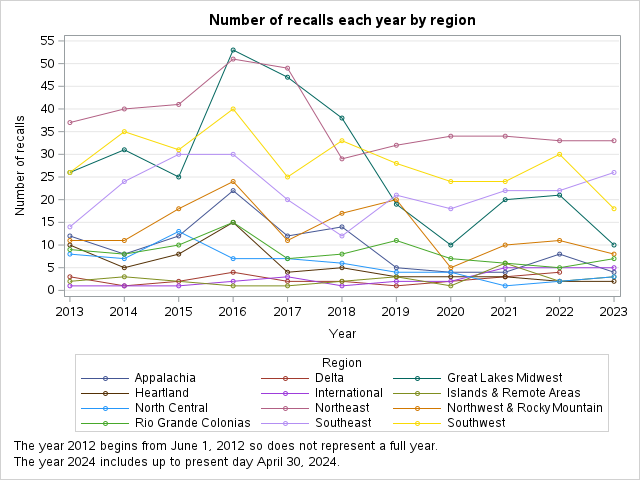
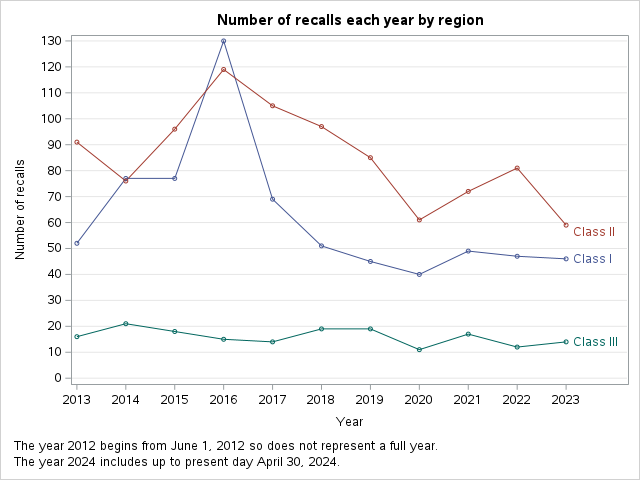
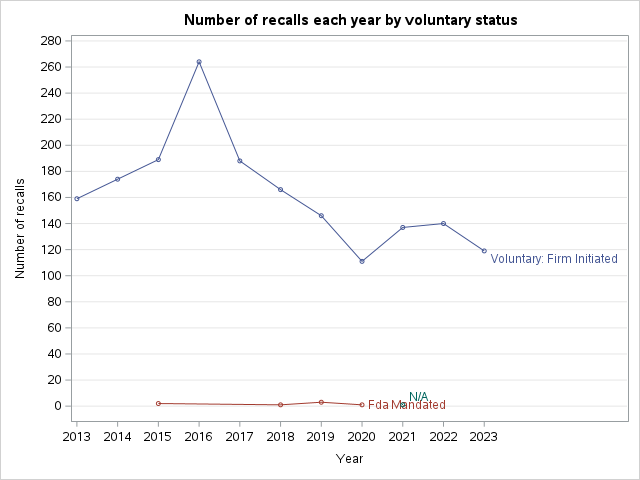
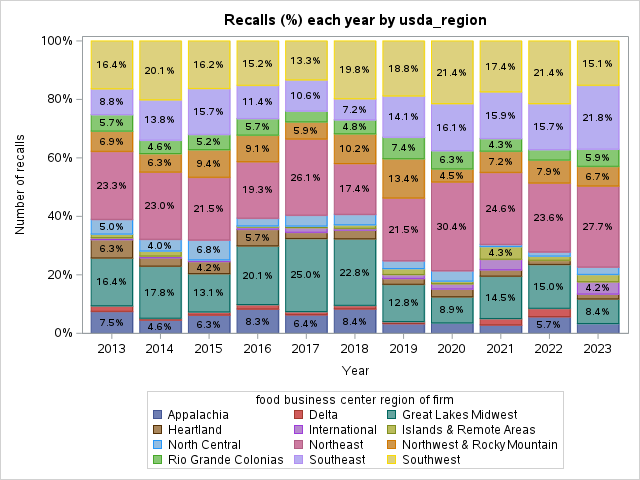
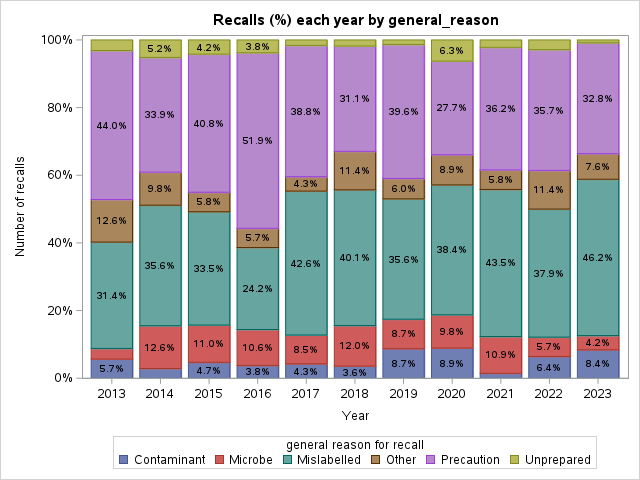
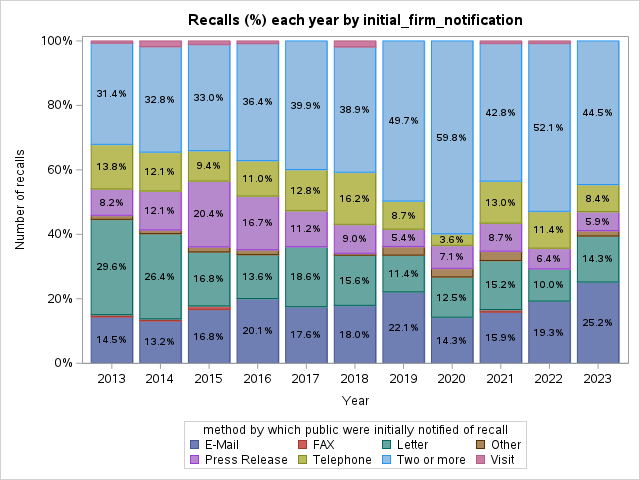
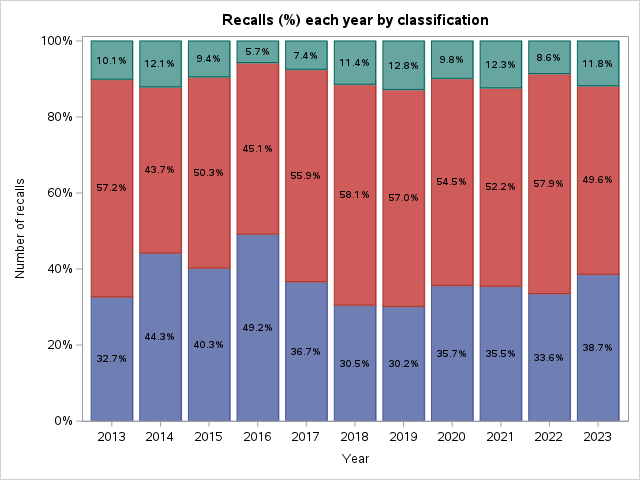
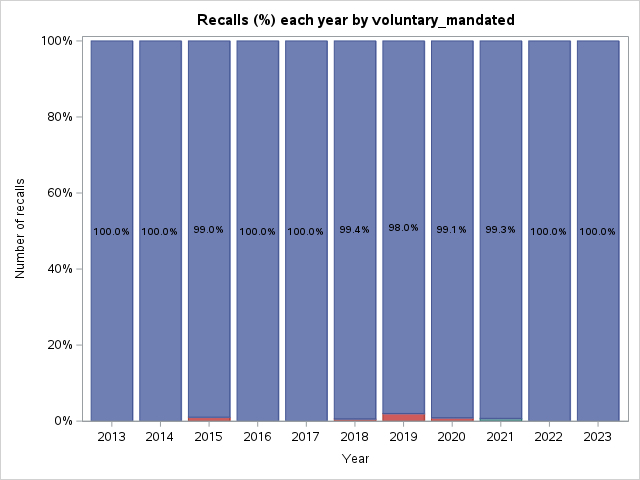
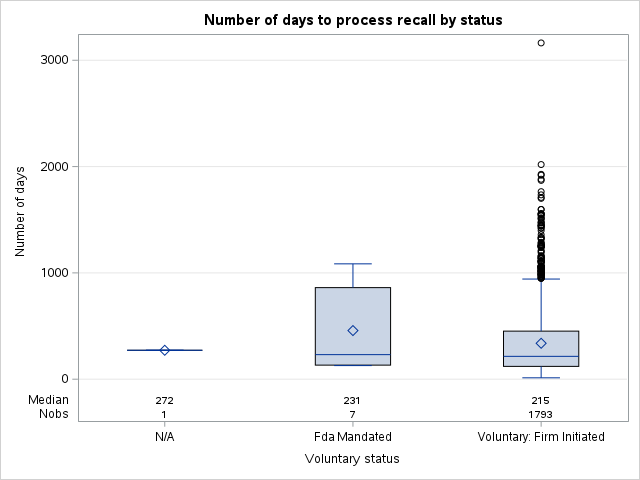
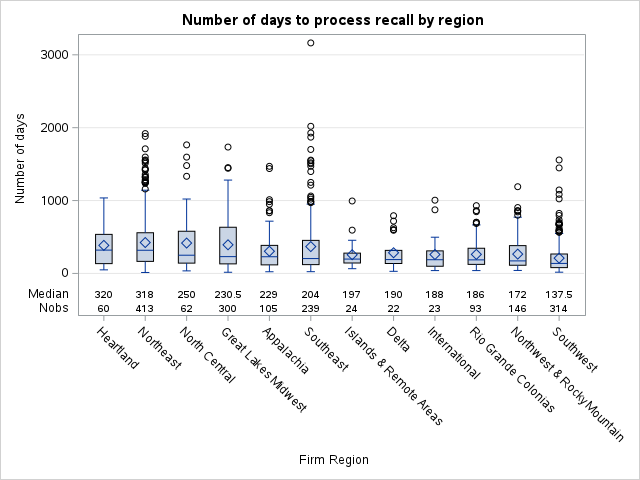
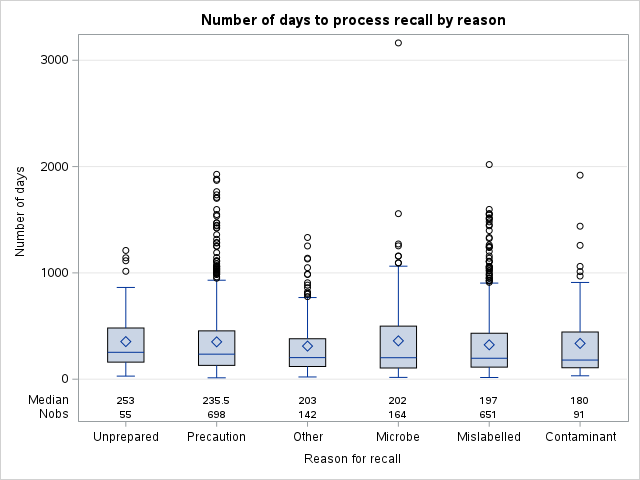
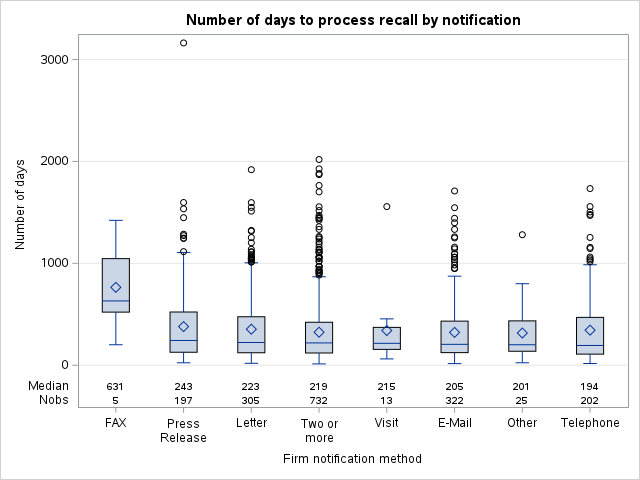
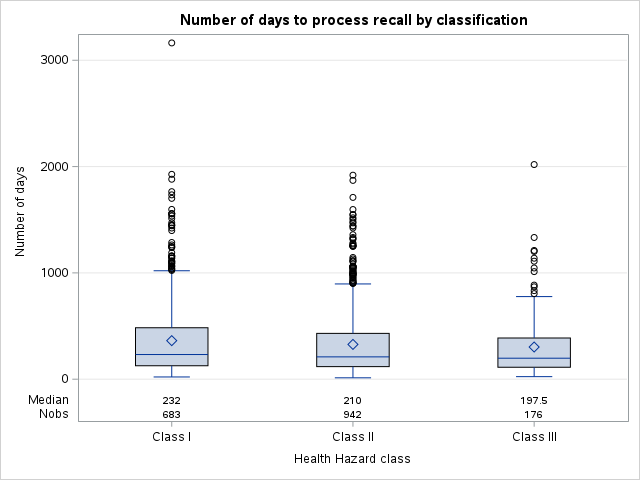
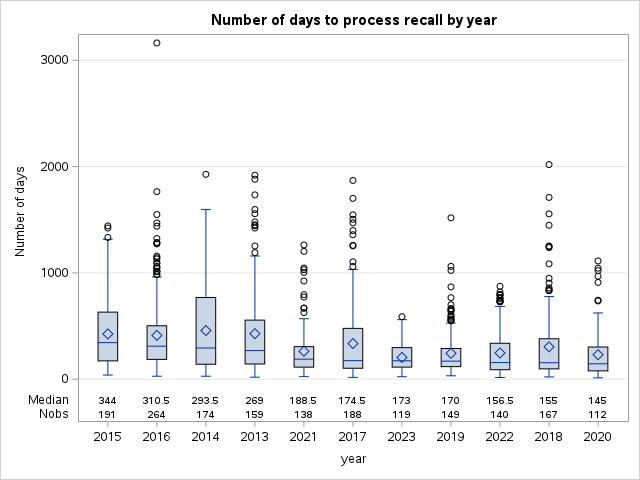

In [15]:
* number of recalls per year;
proc freq data=recalls noprint;
	table date1year/ out=freqcountdate;
run;
proc sort data=freqcountdate;
	by date1year;
run;

ods startpage=now;
title 'Summary statistics of number of recalls per year';
proc means data=freqcountdate;
	*by date1year;
	var count;
run;
title;
	



### Stacked proportional barplots

In [ ]:


* macro, stacked bar plot, freq recalls by categorical variable per year;

%macro stackedbar(num=, var=);

title "Recalls (%) each year by &var";
proc sgplot data=freqcount&num pctlevel=group;
	vbar date1year / response=count group=&var stat=percent seglabel groupdisplay=stack;
	label count='Number of recalls';
	label date1year = 'Year';
run;
title;
footnote;
%mend stackedbar;

%stackedbar(num=1, var=usda_region);
%stackedbar(num=2, var=general_reason);
%stackedbar(num=3, var=initial_firm_notification);
%stackedbar(num=4, var=classification);
%stackedbar(num=5, var=voluntary_mandated);


### Series plots


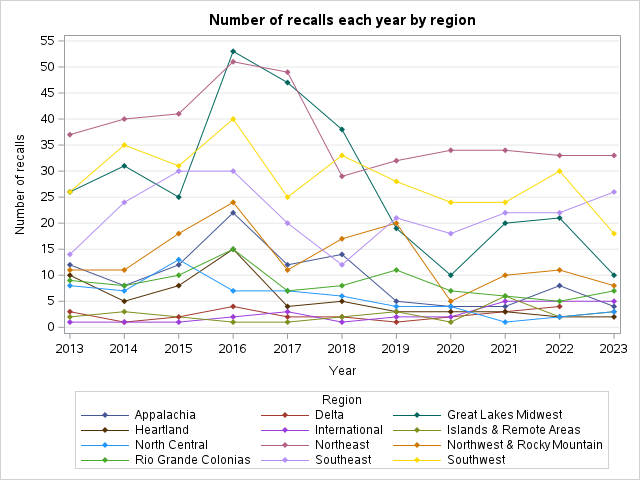
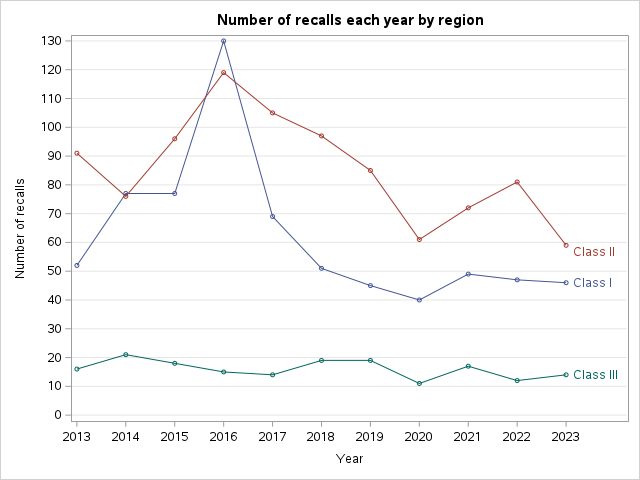
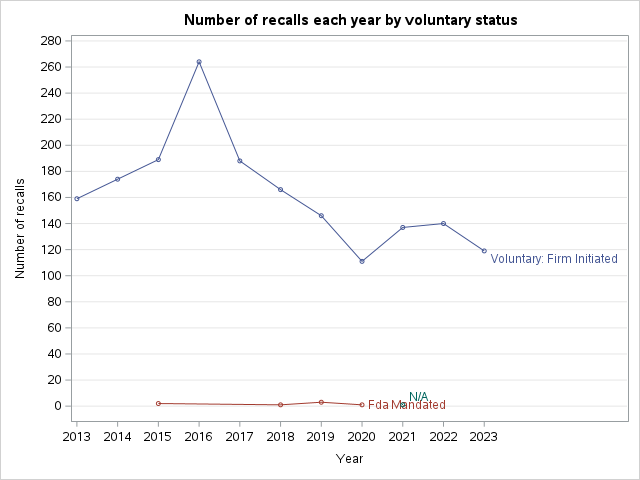

In [22]:

* output freqcount data set;
proc freq data=recalls noprint;
	table date1year*usda_region/ out=freqcount1;
	table date1year*general_reason / out=freqcount2;
	table date1year*initial_firm_notification/ out=freqcount3;
	table date1year*classification / out=freqcount4;
	table date1year*voluntary_mandated / out=freqcount5;
run;

/* series plot, recalls by firm region per year;
ods startpage=now;
title 'Number of recalls each year by region';
proc sgplot data=freqcount1;
	series x=date1year y=count / group=usda_region markers markerattrs=(symbol=diamondfilled size=5pt);
	label count='Number of recalls';
	label date1year = 'Year';
	label usda_region = 'Region';
	yaxis grid values=(0 to 55 by 5);
	keylegend / location=outside position=bottom;
run; */


proc sgplot data=freqcount4 ;
	series x=date1year y=count / group=classification name="class" markers markerattrs=(size=5pt) curvelabel;
	label count='Number of recalls';
	label date1year = 'Year';
	yaxis grid values=(0 to 135 by 10);
	keylegend / location=inside position=bottom ;
run;

title 'Number of recalls each year by voluntary status';
proc sgplot data=freqcount5 ;
	series x=date1year y=count / group=voluntary_mandated markers markerattrs=(size=5pt) curvelabel;
	label count='Number of recalls';
	label date1year = 'Year';
	yaxis grid values=(0 to 280 by 10);
footnote;
run;

### Boxplots

In [ ]:


* macro sort by decreasing median then plot boxplots;
%macro sortboxplot(var=, topic=, label=);

* sort &topic by decreasing median;
proc sql;
create table sort_&topic as 
select *, median(days) as med_&topic
	from recalls
    group by &var
    order by med_&topic descending;
quit;

* boxplot of days by &var;
title "Number of days to process recall by &topic";
proc sgplot data=sort_&topic;
	vbox days / category=&var displaystats=(n median);
	yaxis grid;
	xaxis discreteorder=data;
	label days='Number of days';
	label &var ="&label";
run;
title;

%mend sortboxplot;

%sortboxplot(var=voluntary_mandated, topic=status, label=Voluntary status);
%sortboxplot(var=usda_region, topic=region, label=Firm Region);
%sortboxplot(var=general_reason, topic=reason, label=Reason for recall);
%sortboxplot(var=initial_firm_notification, topic=notification, label=Firm notification method);
%sortboxplot(var=classification, topic=classification, label=Health Hazard class);
%sortboxplot(var=date1year, topic=year, label=year);


In [ ]:
Kruskal-Wallis test results

In [ ]:

* statistical test - Kruskal Wallis;

ods startpage=now;
%macro kwallis (cat=, label=);

ods output KruskalWallisTest=test&cat;
ods select KruskalWallisTest;

ods pdf text = "Non-parametric test of days processed to completion by &label";
proc npar1way data = recalls;
  class &cat;
  var days;
run;
ods output close;

data _null_;
	set test&cat;
	putlog "&cat p-value:";
	put prob;
run;

%mend;

%kwallis(cat=voluntary_mandated, label=status);
%kwallis(cat=usda_region, label=region);
%kwallis(cat=general_reason, label=general reason);
%kwallis(cat=initial_firm_notification, label=notification method);
%kwallis(cat=classification, label=health hazard class);
%kwallis(cat=date1year, label=year);


In [ ]:
proc sql;
	create table forstatemap as 
	select distinct(count(event_id)) as count_event, usda_region, state, country, days
	from recalls
	group by usda_region;
quit;

proc sql;
	create table forcountrymap as 
	select distinct(count(event_id)) as count_event, usda_region, state, country, days
	from recalls
	group by country;
quit;


In [ ]:
data statedays ;
    set recalls;
    rename state = statecode;
run;


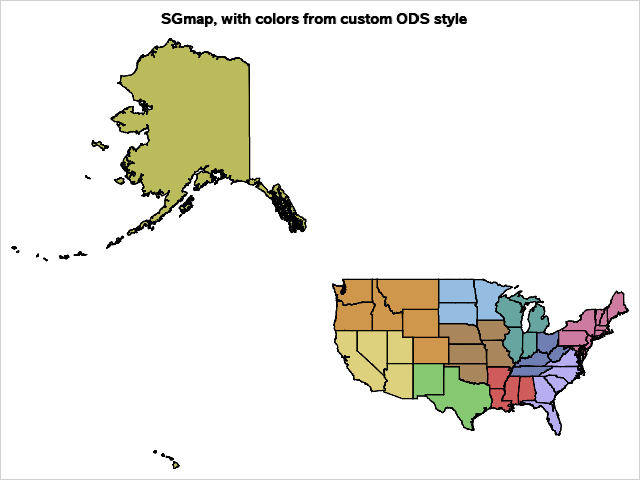

In [61]:


proc gproject data=mapsgfk.us_states out=my_map (drop = lat long)
    latlong eastlong degrees;
    id statecode;
run;


ods graphics on /imagemap tipmax=2500; *add tooltip;

title1 "SGmap, with colors from custom ODS style";
proc sgmap maprespdata=forstatemap mapdata=my_map;
    choromap usda_region / mapid=statecode;
run;

In [39]:
proc print data=mapsgfk.us_states_attr (obs=5);
run;

proc print data=recalls (obs=5);
run;

proc print data=mapsgfk.us_states (obs=5);
    
run;

proc print data=mapsgfk.us_counties (obs=5);
run;